# Modul 04 - 1-Qubit Gatter II

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

(Adapted from [qiskit-textbook](https://github.com/qiskit-community/qiskit-textbook))

In [1]:
run ./00-Inhalt_Tools.ipynb

## Inhaltsverzeichnis    

1. [Das Hadamard Gatter](#hgate)    
2. [Exkurs: Messen in verschiedenen Basen](#measuring)    
3. [Das R<sub>ϕ</sub>-Gatter](#rzgate)    
4. [Das I, S und T-Gatter](#istgates)    
    4.1 [Das I-Gatter](#igate)    
    4.2 [Das S-Gatter](#sgate)    
    4.3 [Das T_Gatter](#tgate)    
5. [Das allgemeine U<sub>3</sub>-Gatter](#generalU3)    

In Die Atome der Logik sind wir auf einige Gatter gestoßen und haben sie benutzt, um eine klassische Berechnung durchzuführen. Eine wichtige Eigenschaft von Quantenschaltungen ist, dass die Operationen (Gatter) zwischen der Initialisierung der Qubits und ihrer Messung immer umkehrbar sind! Diese reversiblen Gatter können als Matrizen und als Rotationen um die Bloch-Kugel dargestellt werden. 

In [2]:
from qiskit import QuantumCircuit, execute, transpile, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## 1. Das Hadamard Gatter  <a id="hgate"></a>

Das Hadamard-Gatter (H-Gatter) ist ein fundamentales Quantengatter. Es erlaubt uns, uns von den Polen der Bloch-Kugel zu entfernen und eine Superposition von $|0\rangle$ und $|1\rangle$ zu erzeugen. Es hat die Matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

Wir können sehen, dass dies die folgenden Transformationen durchführt:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

Dies kann man sich als eine Drehung um den Bloch-Vektor `[1,0,1]` (die Linie zwischen der x- und z-Achse) vorstellen, oder als eine Transformation des Zustands des Qubits zwischen der X- und Z-Basis.

### Kurzübung 1
1. Schreiben Sie das H-Gatter als die äußeren Produkte der Vektoren $|0\rangle$, $|1\rangle$, $|+\rangle$ und $|-\rangle$.
2. Zeigen Sie, dass die Anwendung der Folge von Gattern HZH, auf einen beliebigen Qubit-Zustand äquivalent zur Anwendung eines X-Gatters ist.
3. Finden Sie eine Kombination von X-, Z- und H-Gattern, die äquivalent zu einem Y-Gatter ist (ohne Berücksichtigung der globalen Phase).

## 2. Exkurs: Messen in verschiedenen Basen  <a id="measuring"></a>

Wir haben gesehen, dass die Z-Achse an sich nichts Besonderes ist, und dass es unendlich viele andere Basen gibt. Ähnlich verhält es sich mit der Messung, wir müssen nicht immer in der Berechnungsbasis (der Z-Basis) messen, wir können unsere Qubits in jeder beliebigen Basis messen.

Versuchen wir als Beispiel eine Messung in der X-Basis. Wir können die Wahrscheinlichkeit berechnen, entweder $|+\rangle$ oder $|-\rangle$ zu messen:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

Und nach der Messung ist die Superposition zerstört. Da Qiskit nur die Messung in der Z-Basis erlaubt, müssen wir unsere eigene Bases mit Hilfe von Hadamard-Gates erstellen:

In [3]:
# Erstellen Sie die X-measurement Funktion:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1, 1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

In den obigen Kurzübungen haben wir gesehen, dass Sie ein X-Gatter erzeugen können, indem Sie unser Z-Gatter zwischen zwei H-Gatter einklemmen:

$$ X = HZH $$

Beginnend in der Z-Basis schaltet das H-Gatter unser Qubit in die X-Basis, das Z-Gatter bewirkt ein NICHT in der X-Basis, und das letzte H-Gatter bringt unser Qubit wieder in die Z-Basis. Wir können überprüfen, dass sich dies immer wie ein X-Gatter verhält, indem wir die Matrizen multiplizieren:

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Derselben Logik folgend, haben wir eine X-Messung erzeugt, indem wir vor unserer Messung von der X-Basis in die Z-Basis transformiert haben. Da der Vorgang des Messens je nach System unterschiedliche Auswirkungen haben kann (z. B. setzen manche Systeme das Qubit nach der Messung immer auf $|0\rangle$ zurück, während andere es als gemessenen Zustand belassen können), ist der Zustand des Qubits nach der Messung undefiniert und wir müssen es zurücksetzen, wenn wir es wieder verwenden wollen.

Lassen Sie uns nun die Ergebnisse sehen:

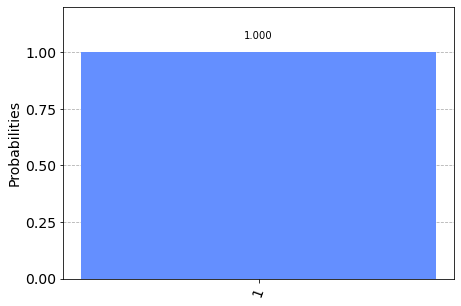

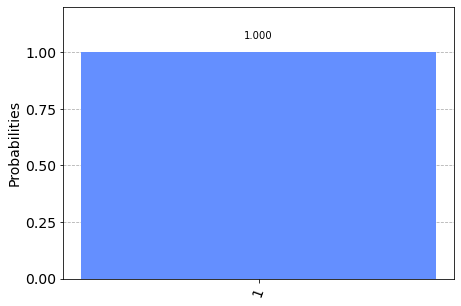

In [11]:
sim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
job = execute(qc, sim)  # Assemble circuit into a Qobj that can be run
counts = job.result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

Wir haben unser Qubit im Zustand $|-\rangle$ initialisiert, aber wir können sehen, dass wir nach der Messung unser Qubit in den Zustand $|1\rangle$ kollabiert haben. Wenn Sie die Zelle erneut ausführen, werden Sie das gleiche Ergebnis sehen, da der Zustand $|-\rangle$ ein Basis-Zustand ist und eine Messung dieses Zustands in der X-Basis immer das gleiche Ergebnis erzeugt.

### Kurzübung 2
1.	Wenn wir unser Qubit im Zustand $|+\rangle$ initialisieren, wie groß ist die Wahrscheinlichkeit, es im Zustand $|-\rangle$ zu messen?
2.	Benutzen Sie Qiskit, um die Wahrscheinlichkeit der Messung eines $|0\rangle$-Qubits in den Zuständen $|+\rangle$ und $|-\rangle$ darzustellen (**Tipp:** Sie sollten `.get_counts()` und `plot_histogram()` benutzen).
3.	Versuchen Sie, eine Funktion zu erstellen, die in der Y-Basis misst.

Das Messen in verschiedenen Basen ermöglicht es uns, Heisenbergs berühmte Unschärferelation in Aktion zu sehen. Die Gewissheit, einen Zustand in der Z-Basis zu messen, hebt alle Gewissheit auf, einen bestimmten Zustand in der X-Basis zu messen, und umgekehrt. Ein häufiges Missverständnis ist, dass die Unschärfe durch die Grenzen unserer Geräte bedingt ist, aber hier können wir sehen, dass die Unschärfe tatsächlich Teil der Natur des Qubits ist. 

Wenn wir zum Beispiel unser Qubit in den Zustand $|0\rangle$ versetzen, ist unsere Messung in der Z-Basis sicher $|0\rangle$, aber unsere Messung in der X-Basis ist völlig zufällig! Ähnlich verhält es sich, wenn wir unser Qubit in den Zustand $|-\rangle$ versetzen, dann ist unsere Messung in der X-Basis sicher $|-\rangle$, aber jetzt wird jede Messung in der Z-Basis völlig zufällig sein.

Allgemeiner ausgedrückt: Egal in welchem Zustand sich unser Quantensystem befindet, es gibt immer eine Messung, die ein deterministisches Ergebnis hat. 

Die Einführung des H-Gatters hat uns erlaubt, einige interessante Phänomene zu erforschen, aber wir sind in unseren Quantenoperationen immer noch sehr eingeschränkt. Lassen Sie uns nun eine neue Art von Gatter einführen:

## 3. Das R<sub>ϕ</sub>-Gatter  <a id="rzgate"></a>

Das R<sub>ϕ</sub>-Gatter ist _parametrisiert,_ d.h. es benötigt eine Zahl ($\phi$), die ihm genau sagt, was es tun soll. Das R<sub>ϕ</sub>-Gatter führt eine Drehung von $\phi$ um die Richtung der Z-Achse durch (und wird deshalb manchmal auch als R<sub>z</sub>-Gatter bezeichnet). Es hat die Matrix:

$$
R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Dabei ist $\phi$ eine reelle Zahl. In Qiskit spezifizieren wir ein R<sub>ϕ</sub>-Gatter mit `rz(phi, qubit)`:

In [12]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw()

┌─────────┐
q_0: ┤ RZ(π/4) ├
     └─────────┘

Sie werden feststellen, dass das Z-Gatter ein Spezialfall des R<sub>ϕ</sub>-Gatter ist, mit $\phi = \pi$. In der Tat gibt es drei weitere häufig referenzierte Gatter, die wir in diesem Kapitel erwähnen werden, die alle Spezialfälle des R<sub>ϕ</sub>-Gatter sind:

## 4. Das I, S und T-Gatter  <a id="istgates"></a>

### 4.1 Das I-Gatter  <a id="igate"></a>

Zuerst kommt das I-Gatter (auch bekannt als "Id-Gatter" oder "Identity Gatter"). Dies ist einfach ein Gatter, das nichts tut. Seine Matrix ist die Identitätsmatrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Die Anwendung des Identitäts-Gatters irgendwo in Ihrer Schaltung sollte keine Auswirkung auf den Qubit-Zustand haben, daher ist es interessant, dass dies überhaupt als ein Gatter betrachtet wird. Es gibt zwei Hauptgründe dafür, einer ist, dass es oft in Berechnungen verwendet wird, zum Beispiel: der Nachweis, dass das X-Gatter seine eigene Inverse ist:

$$ I = XX $$

Zweitens ist es bei der Betrachtung von echter Hardware oft sinnvoll, eine "do-nothing"- oder "none"-Operation anzugeben.

#### Kurzübung
1. Was sind die Eigenzustände des I-Gate?

### 4.2 Das S-Gatter  <a id="sgate"></a>

Das nächste zu erwähnende Gatter ist das S-Gatter (manchmal auch $\sqrt{Z}$-Gate genannt), dies ist ein R<sub>ϕ</sub>-Gatter mit $\phi = \pi/2$. Es macht eine Vierteldrehung um die Bloch-Kugel. Es ist wichtig zu beachten, dass das S-Gatter im Gegensatz zu allen bisher in diesem Kapitel vorgestellten Gatter **nicht** seine eigene Inverse ist! Infolgedessen werden Sie oft das S<sup>†</sup>-Gatter, (auch "S-Dagger", "Sdg" oder $\sqrt{Z}^\dagger$-Gatter) sehen.  Das S<sup>†</sup>-Gatter ist eindeutig ein R<sub>ϕ</sub>-Gatter mit $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

Der Name " $\sqrt{Z}$-Gatter" rührt daher, dass zwei nacheinander angelegte S-Gatter die gleiche Wirkung wie ein Z-Gatter haben:

$$ SS|q\rangle = Z|q\rangle $$

Diese Notation ist im gesamten Quantencomputing üblich.

So fügen Sie ein S-Gatter in Qiskit hinzu:

In [13]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ S ├┤ SDG ├
     └───┘└─────┘

### 4.3 Das T-Gatter <a id="tgate"></a>
Das T-Gatter ist ein sehr häufig verwendetes Gatter, es ist ein R<sub>ϕ</sub>-Gatter mit $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

Wie das S-Gatter wird das T-Gatter manchmal auch als $\sqrt[4]{Z}$-Gatter bezeichnet.

In Qiskit:

In [14]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ T ├┤ TDG ├
     └───┘└─────┘

## 6. Allgemeine U-Gatter  <a id="generalU3"></a>

Wie wir bereits gesehen haben, waren die I-, Z-, S- und T-Gatter alle Spezialfälle des allgemeineren R<sub>ϕ</sub>-Gatter. Auf die gleiche Weise ist das U<sub>3</sub>-Gatter das allgemeinste aller Ein-Qubit-Quantengatter. Es ist ein parametrisiertes Gatter der Form:

$$
U_3(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix}
$$

Jedes Gatter in diesem Kapitel könnte als $U_3(\theta,\phi,\lambda)$ spezifiziert werden, aber es ist ungewöhnlich, dies in einem Schaltplan zu sehen, möglicherweise aufgrund der Schwierigkeit, dies zu lesen.

Qiskit bietet U<sub>2</sub>- und U<sub>1</sub>-Gatter, die Sonderfälle des U<sub>3</sub>-Gatters sind, bei denen $\theta = \tfrac{\pi}{2}$ bzw. $\theta = \phi = 0$ ist. Sie werden feststellen, dass das U<sub>1</sub>-Gatter äquivalent zum R<sub>ϕ</sub>-Gatter ist.

$$
\begin{aligned}
U_3(\tfrac{\pi}{2}, \phi, \lambda) = U_2 = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & -e^{i\lambda} \\
            e^{i\phi} & e^{i\lambda+i\phi}
     \end{bmatrix}
& \quad &
U_3(0, 0, \lambda) = U_1 = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix}
\end{aligned}
$$

Bevor sie auf echter IBM-Quantenhardware laufen, werden alle Ein-Qubit-Operationen auf $U_1$ , $U_2$ und $U_3$ heruntergerechnet. Aus diesem Grund werden sie manchmal auch als _physikalische Gatter_ bezeichnet.

Daraus sollte ersichtlich sein, dass es unendlich viele mögliche Gatter gibt, und dass dazu auch R<sub>x</sub> und R<sub>y</sub>-Gatter gehören, obwohl sie hier nicht erwähnt werden. Es muss auch angemerkt werden, dass es nichts Besonderes an der Z-Basis gibt, außer dass sie als Standard-Rechenbasis gewählt wurde. Deshalb haben wir Namen für die S- und T-Gatter, aber nicht deren X- und Y-Äquivalente (z. B. $\sqrt{X}$ und $\sqrt[4]{Y}$).


## Qiskit

In [15]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}

## Copyright

Copyright 2021 Dual Software GmbH and SVA System Vertrieb Alexander GmbH

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.